In [130]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading in the json file with read_json

In [7]:
business = pd.read_json('C:\\Users\\Sam Cannon\\Desktop\\Python\\Springboard\\Yelp Project\\business.json', lines = True)

In [9]:
business.head()

address  \
0     2818 E Camino Acequia Drive   
1            30 Eglinton Avenue W   
2       10110 Johnston Rd, Ste 15   
3   15655 W Roosevelt St, Ste 237   
4  4209 Stuart Andrew Blvd, Ste F   

                                          attributes             business_id  \
0                           {'GoodForKids': 'False'}  1SWheh84yJXfytovILXOAQ   
1  {'RestaurantsReservations': 'True', 'GoodForMe...  QXAEGFB4oINsVuTFxEYKFQ   
2  {'GoodForKids': 'True', 'NoiseLevel': 'u'avera...  gnKjwL_1w79qoiV3IC_xQQ   
3                                               None  xvX2CttrVhyG2z1dFg_0xw   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...  HhyxOkGAM07SRYtlQ4wMFQ   

                                          categories         city  \
0                                  Golf, Active Life      Phoenix   
1  Specialty Food, Restaurants, Dim Sum, Imported...  Mississauga   
2                  Sushi Bars, Restaurants, Japanese    Charlotte   
3                      Insurance, Financial Services     Goodyear   
4  Plumbing, Shopping, Local Services, Home Servi...    Charlotte   

                                               hours  is_open   latitude  \
0                                               None        0  33.522143   
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        1  43.605499   
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...        1  35.092564   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...        1  33.455613   
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        1  35.190012   

    longitude                             name postal_code  review_count  \
0 -112.018481       Arizona Biltmore Golf Club       85016             5   
1  -79.652289       Emerald Chinese Restaurant     L5R 3E7           128   
2  -80.859132      Musashi Japanese Restaurant       28210           170   
3 -112.395596  Farmers Insurance - Paul Lorenz       85338             3   
4  -80.887223              Queen City Plumbing       28217             4   

   stars state  
0    3.0    AZ  
1    2.5    ON  
2    4.0    NC  
3    5.0    AZ  
4    4.0    NC

Now I am going to look at the Restaurants included in this dataframe of businesses

In [93]:
restaurants = business[business.categories.str.contains('Restaurant') == True].sort_values('stars', ascending = False).reset_index().drop('index', axis = 1)

In [110]:
restaurants.shape

(59387, 4)

Now I want to look at the categories within the Restaurants dataframe that have the most reviews

In [168]:
restaurants['categories'].apply(pd.Series).stack().head()

0  0    Pets, American (Traditional), Restaurants, Pet...
1  0    Food, Restaurants, Bakeries, Specialty Food, C...
2  0    Food Trucks, Food, Restaurants, Breakfast & Br...
3  0    Specialty Food, Halal, Food, Indian, Ethnic Fo...
4  0                 Modern European, Fondue, Restaurants
dtype: object

In [134]:
restaurant_category_counts = restaurants['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)
restaurant_category_counts.nlargest(10)

Restaurants, Pizza                     1042
Pizza, Restaurants                      993
Mexican, Restaurants                    885
Restaurants, Mexican                    853
Chinese, Restaurants                    840
Restaurants, Chinese                    789
Restaurants, Italian                    474
Italian, Restaurants                    446
American (Traditional), Restaurants     282
Vietnamese, Restaurants                 272
dtype: int64

In [139]:
restaurant_category_counts = pd.DataFrame(restaurant_category_counts)

In [143]:
cats = restaurant_category_counts.reset_index().rename(columns = {'index':'restaurant', 0:'number_of_reviews'})

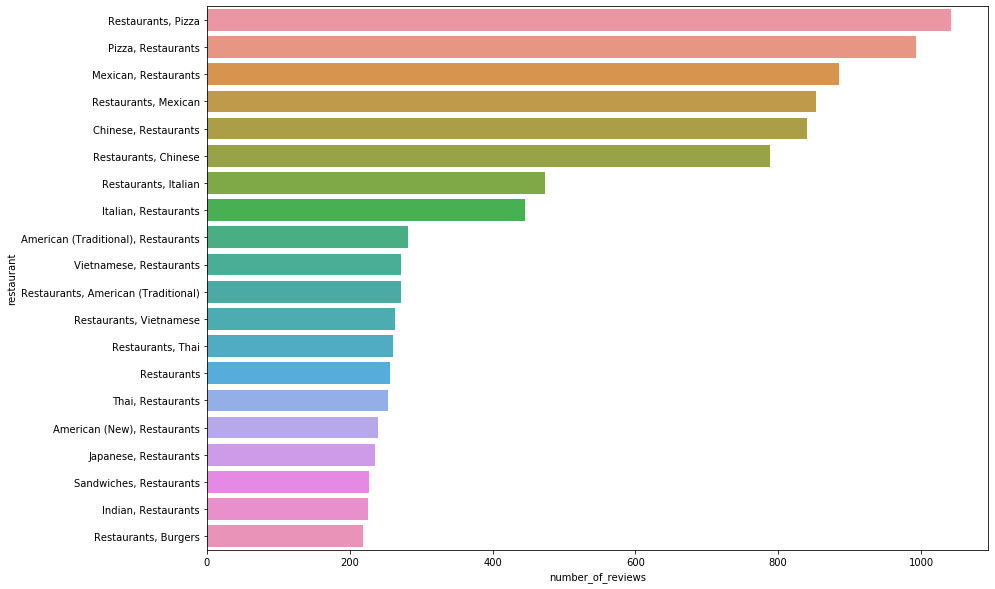

In [147]:
import seaborn as sns
plt.figure(figsize = (14, 10))
sns.barplot(data = cats, x = 'number_of_reviews', y = 'restaurant')

Save a dataframe containing the ids, review counts, stars, and state of each Pizza or Mexican food business

In [164]:
final_df = business[business.categories.str.contains('Pizza|Mexican') == True].sort_values('categories').reset_index(drop = True).drop(['address', 
                                        'attributes', 'city', 'categories', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code'], axis = 1)
final_df.head()

business_id  review_count  stars state
0  6HelOB6YrvhW_p_qsV0Zmw             5    4.0    AZ
1  4P0X_Mfb0HEmvXR47w_xWg            13    4.0    AZ
2  GtxwFRoQTitTa6u3oVgS0g             9    5.0    OH
3  sxQrSzv4SS4b6o3tgmWS7A            16    3.0    PA
4  QmvtdOl4PEiMizrMyEQZTg             7    2.0    ON

In [166]:
final_df.shape

(11398, 4)

In [165]:
final_df.to_csv('business_list.csv')

In [201]:
business_ids = final_df['business_id'].values
business_ids[:5]

array(['6HelOB6YrvhW_p_qsV0Zmw', '4P0X_Mfb0HEmvXR47w_xWg',
       'GtxwFRoQTitTa6u3oVgS0g', 'sxQrSzv4SS4b6o3tgmWS7A',
       'QmvtdOl4PEiMizrMyEQZTg'], dtype=object)

## Reading In Reviews and Chunking Them Out

Reading in using chuncksize because my computer cannot import it all at once with the available RAM

In [203]:
review_reader = pd.read_json('C:\\Users\\Sam Cannon\\Desktop\\Python\\Springboard\\Yelp Project\\review.json', lines=True, chunksize=100000)

In [204]:
%%time


reviews = [review.loc[review['business_id'].apply(lambda x: x in business_ids)] for review in review_reader]

Wall time: 1h 8min 46s


Create dataframe from reviews

In [205]:
reviews = pd.concat(reviews)

In [206]:
reviews.head()

business_id  cool                date  funny  \
5   eU_713ec6fTGNO4BegRaww     0 2013-01-20 13:25:59      0   
15  YvrylyuWgbP90RgMqZQVnQ     0 2017-04-07 21:27:49      0   
17  cHdJXLlKNWixBXpDwEGb_A     1 2015-04-01 16:30:00      7   
19  y-Iw6dZflNix4BdwIyTNGA     0 2014-06-27 21:19:23      0   
20  qx6WhZ42eDKmBchZDax4dQ     0 2017-03-27 01:14:37      0   

                 review_id  stars  \
5   fdiNeiN_hoCxCMy2wTRW9g      4   
15  svK3nBU7Rk8VfGorlrN52A      5   
17  6BnQwlxRn7ZuWdzninM9sQ      3   
19  4bUyL7lzoWzDZaJETAKREg      3   
20  Amo5gZBvCuPc_tZNpHwtsA      5   

                                                 text  useful  \
5   I'll be the first to admit that I was not exci...       0   
15  You can't really find anything wrong with this...       0   
17  I love chinese food and I love mexican food. W...       1   
19  Good selection of classes of beers and mains. ...       0   
20  Our family LOVES the food here. Quick, friendl...       1   

                   user_id  
5   w31MKYsNFMrjhWxxAb5wIw  
15  NJlxGtouq06hhC7sS2ECYw  
17  JSrP-dUmLlwZiI7Dp3PQ2A  
19  _N7Ndn29bpll_961oPeEfw  
20  DzZ7piLBF-WsJxqosfJgtA

I bet Yelp won't allow people to have these reviews in a csv that they can alter? so that is why I get an error here, but I can access this csv from my files, so no big deal

In [223]:
reviews.to_csv('restaurant_reviews.csv', index = False)

## Generate Wordcloud From Reviews

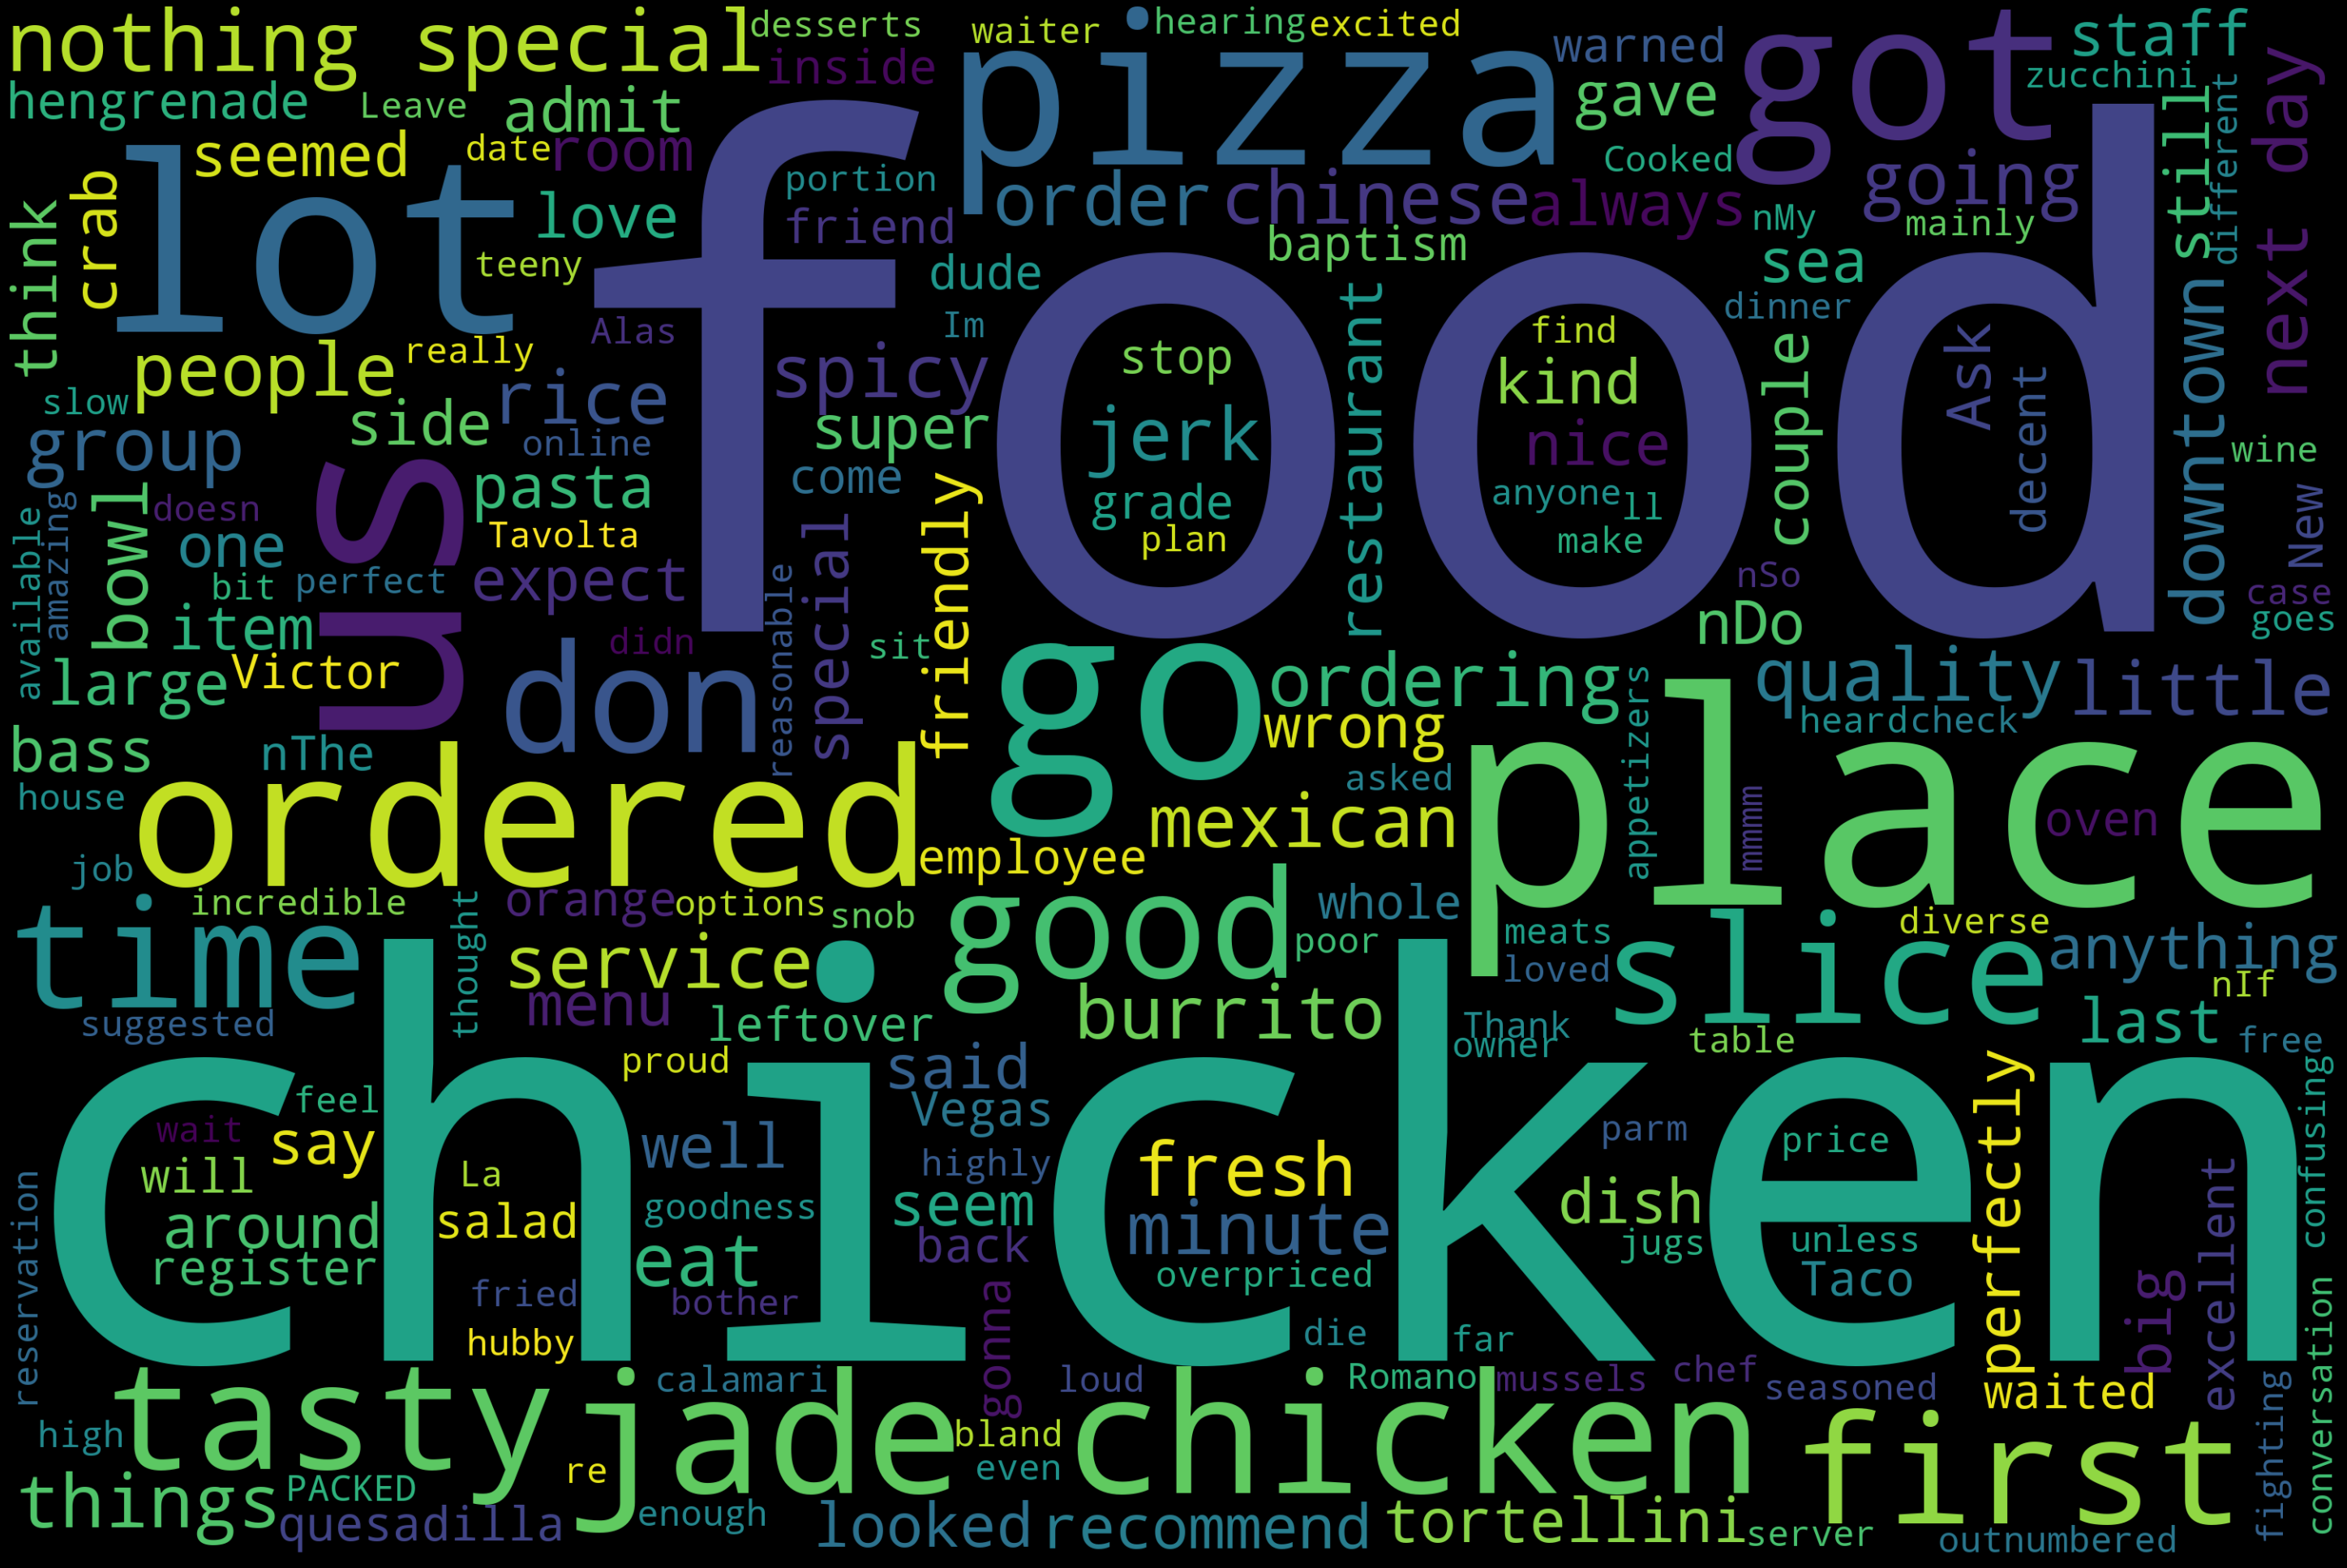

In [216]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = reviews.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Now I want to look at a wordcloud for positive and negative reviews based on their sentiment

In [222]:
#https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews['tidy_reviews'] = reviews['text'].apply(lambda x: clean_text(x))

__Get Sentiment of Each Review__

In [224]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews['sentiments'] = reviews['tidy_reviews'].apply(lambda x: sid.polarity_scores(x))
reviews = pd.concat([reviews.drop(['sentiments'], axis=1), reviews['sentiments'].apply(pd.Series)], axis=1)

You can see here that the sentiment intensity analyzer returns a positive, netrual, negative, and compound score for each review

In [225]:
reviews.head()

business_id  cool                date  funny  \
5   eU_713ec6fTGNO4BegRaww     0 2013-01-20 13:25:59      0   
15  YvrylyuWgbP90RgMqZQVnQ     0 2017-04-07 21:27:49      0   
17  cHdJXLlKNWixBXpDwEGb_A     1 2015-04-01 16:30:00      7   
19  y-Iw6dZflNix4BdwIyTNGA     0 2014-06-27 21:19:23      0   
20  qx6WhZ42eDKmBchZDax4dQ     0 2017-03-27 01:14:37      0   

                 review_id  stars  \
5   fdiNeiN_hoCxCMy2wTRW9g      4   
15  svK3nBU7Rk8VfGorlrN52A      5   
17  6BnQwlxRn7ZuWdzninM9sQ      3   
19  4bUyL7lzoWzDZaJETAKREg      3   
20  Amo5gZBvCuPc_tZNpHwtsA      5   

                                                 text  useful  \
5   I'll be the first to admit that I was not exci...       0   
15  You can't really find anything wrong with this...       0   
17  I love chinese food and I love mexican food. W...       1   
19  Good selection of classes of beers and mains. ...       0   
20  Our family LOVES the food here. Quick, friendl...       1   

                   user_id                                       tidy_reviews  \
5   w31MKYsNFMrjhWxxAb5wIw  i'll first admit excite go la tavolta food sno...   
15  NJlxGtouq06hhC7sS2ECYw  can't really find anything wrong place pasta p...   
17  JSrP-dUmLlwZiI7Dp3PQ2A  love chinese food love mexican food go wrong c...   
19  _N7Ndn29bpll_961oPeEfw  good selection class beer main i've twice.\n\n...   
20  DzZ7piLBF-WsJxqosfJgtA  family love food quick friendly delicious grea...   

      neg    neu    pos  compound  
5   0.109  0.593  0.298    0.9904  
15  0.139  0.666  0.195    0.3892  
17  0.094  0.701  0.205    0.9832  
19  0.118  0.716  0.165    0.7572  
20  0.000  0.315  0.685    0.9451

## Positive Reviews
- filtering the reviews by looking at high positivity scores

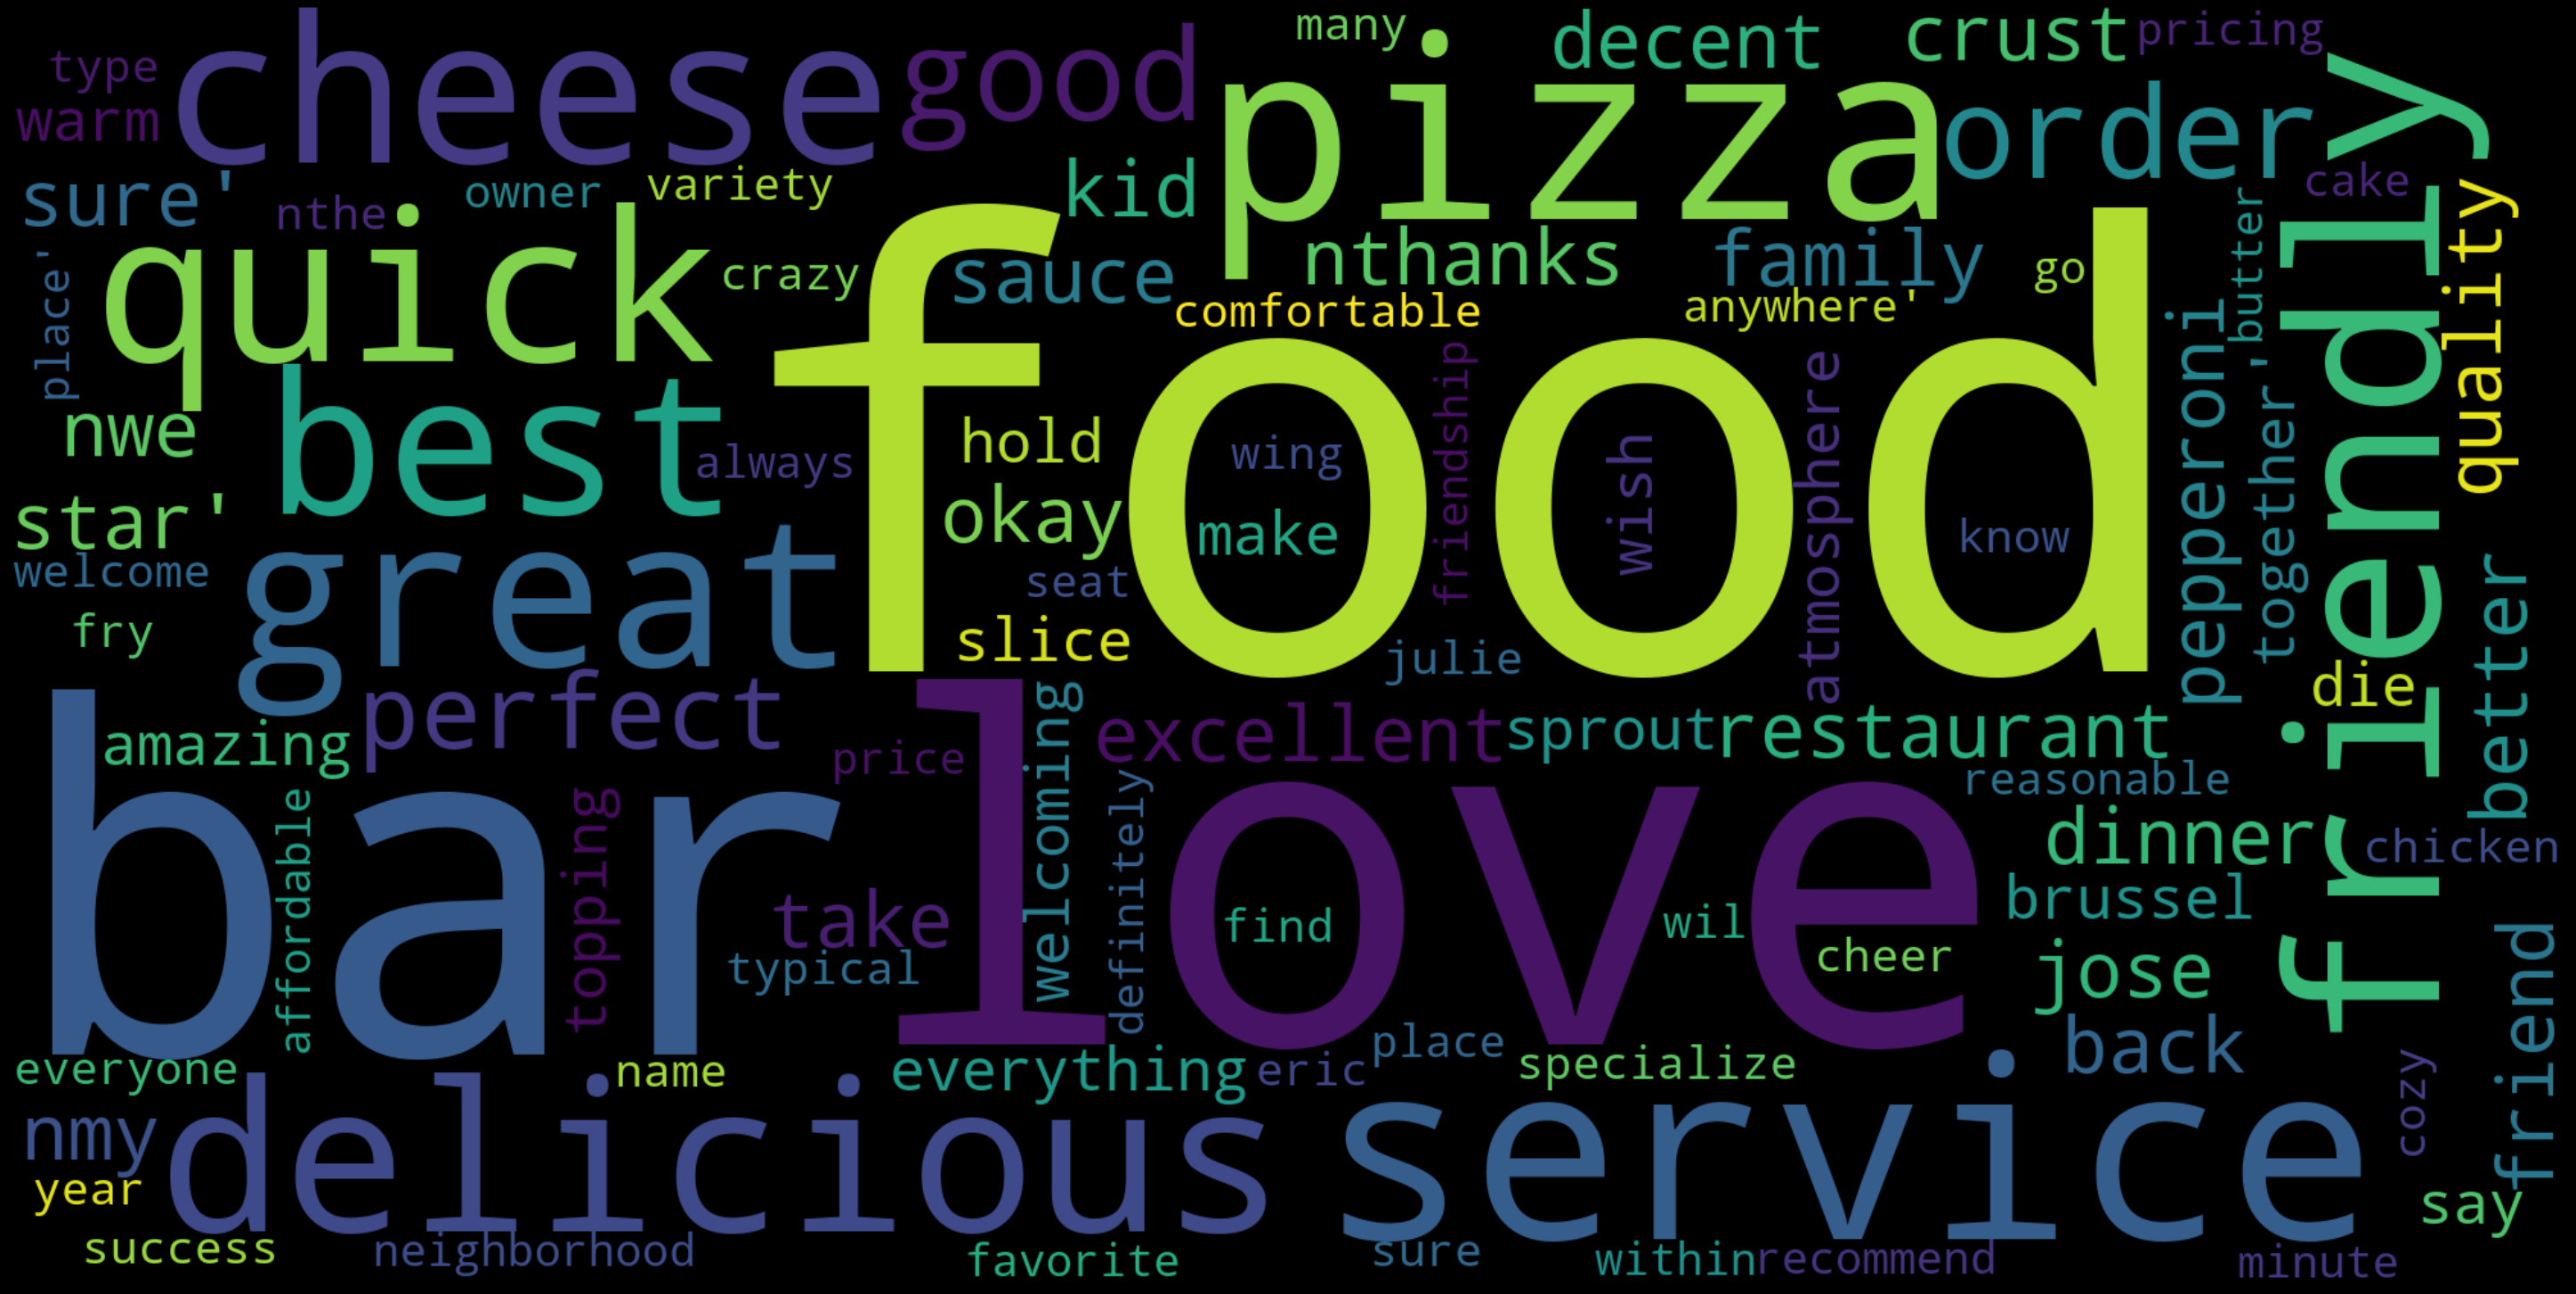

In [231]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = reviews[reviews['pos'] > .5]['tidy_reviews'].values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Negative Reviews
- Looking at reviews with a negativity score of greater than .5
- interesting to see here that the analyzer looked at the word 'bomb' as bad, which is probably the opposite of what was intended, I need to probably add 'bomb' to a positive words dictionary

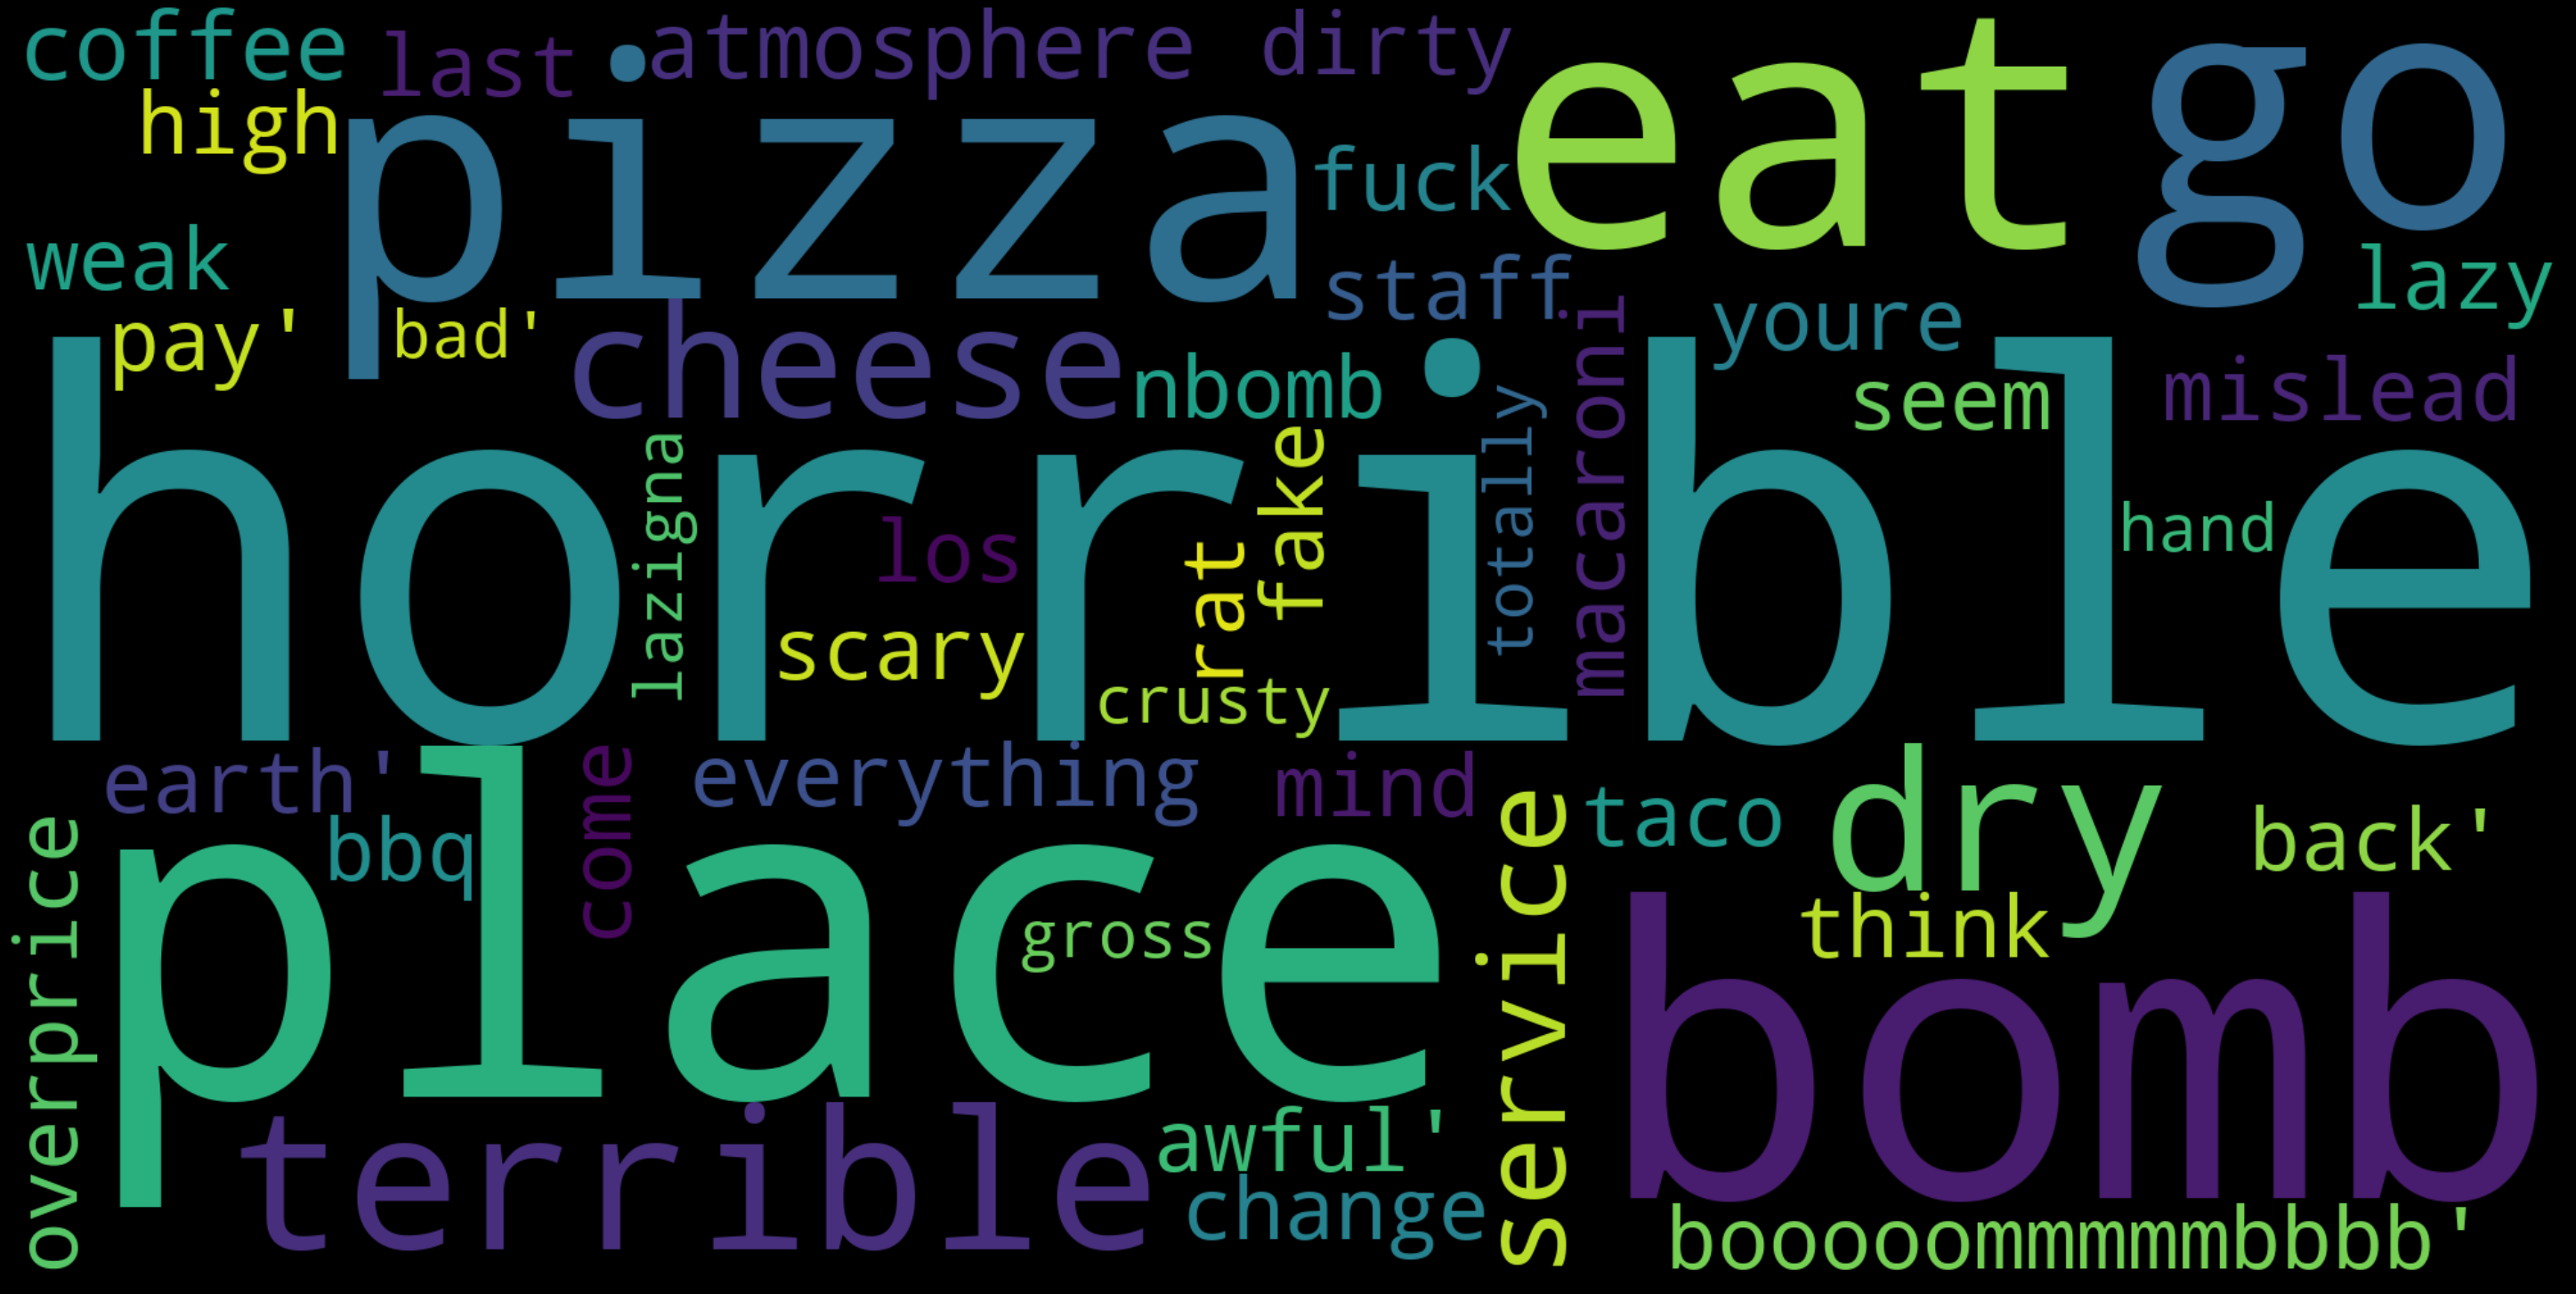

In [230]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = reviews[reviews['neg'] > .5]['tidy_reviews'].values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## But...we could also just partition these by star rating

In [232]:
reviews.head()

business_id  cool                date  funny  \
5   eU_713ec6fTGNO4BegRaww     0 2013-01-20 13:25:59      0   
15  YvrylyuWgbP90RgMqZQVnQ     0 2017-04-07 21:27:49      0   
17  cHdJXLlKNWixBXpDwEGb_A     1 2015-04-01 16:30:00      7   
19  y-Iw6dZflNix4BdwIyTNGA     0 2014-06-27 21:19:23      0   
20  qx6WhZ42eDKmBchZDax4dQ     0 2017-03-27 01:14:37      0   

                 review_id  stars  \
5   fdiNeiN_hoCxCMy2wTRW9g      4   
15  svK3nBU7Rk8VfGorlrN52A      5   
17  6BnQwlxRn7ZuWdzninM9sQ      3   
19  4bUyL7lzoWzDZaJETAKREg      3   
20  Amo5gZBvCuPc_tZNpHwtsA      5   

                                                 text  useful  \
5   I'll be the first to admit that I was not exci...       0   
15  You can't really find anything wrong with this...       0   
17  I love chinese food and I love mexican food. W...       1   
19  Good selection of classes of beers and mains. ...       0   
20  Our family LOVES the food here. Quick, friendl...       1   

                   user_id                                       tidy_reviews  \
5   w31MKYsNFMrjhWxxAb5wIw  i'll first admit excite go la tavolta food sno...   
15  NJlxGtouq06hhC7sS2ECYw  can't really find anything wrong place pasta p...   
17  JSrP-dUmLlwZiI7Dp3PQ2A  love chinese food love mexican food go wrong c...   
19  _N7Ndn29bpll_961oPeEfw  good selection class beer main i've twice.\n\n...   
20  DzZ7piLBF-WsJxqosfJgtA  family love food quick friendly delicious grea...   

      neg    neu    pos  compound  
5   0.109  0.593  0.298    0.9904  
15  0.139  0.666  0.195    0.3892  
17  0.094  0.701  0.205    0.9832  
19  0.118  0.716  0.165    0.7572  
20  0.000  0.315  0.685    0.9451

In [242]:
#we'll take everything with 4+ stars as a positive review, everything less will be considered negative
positive_reviews = reviews[reviews['stars'] >= 4]
negative_reviews = reviews[reviews['stars'] < 4]

## Positive Reviews by Star Rating

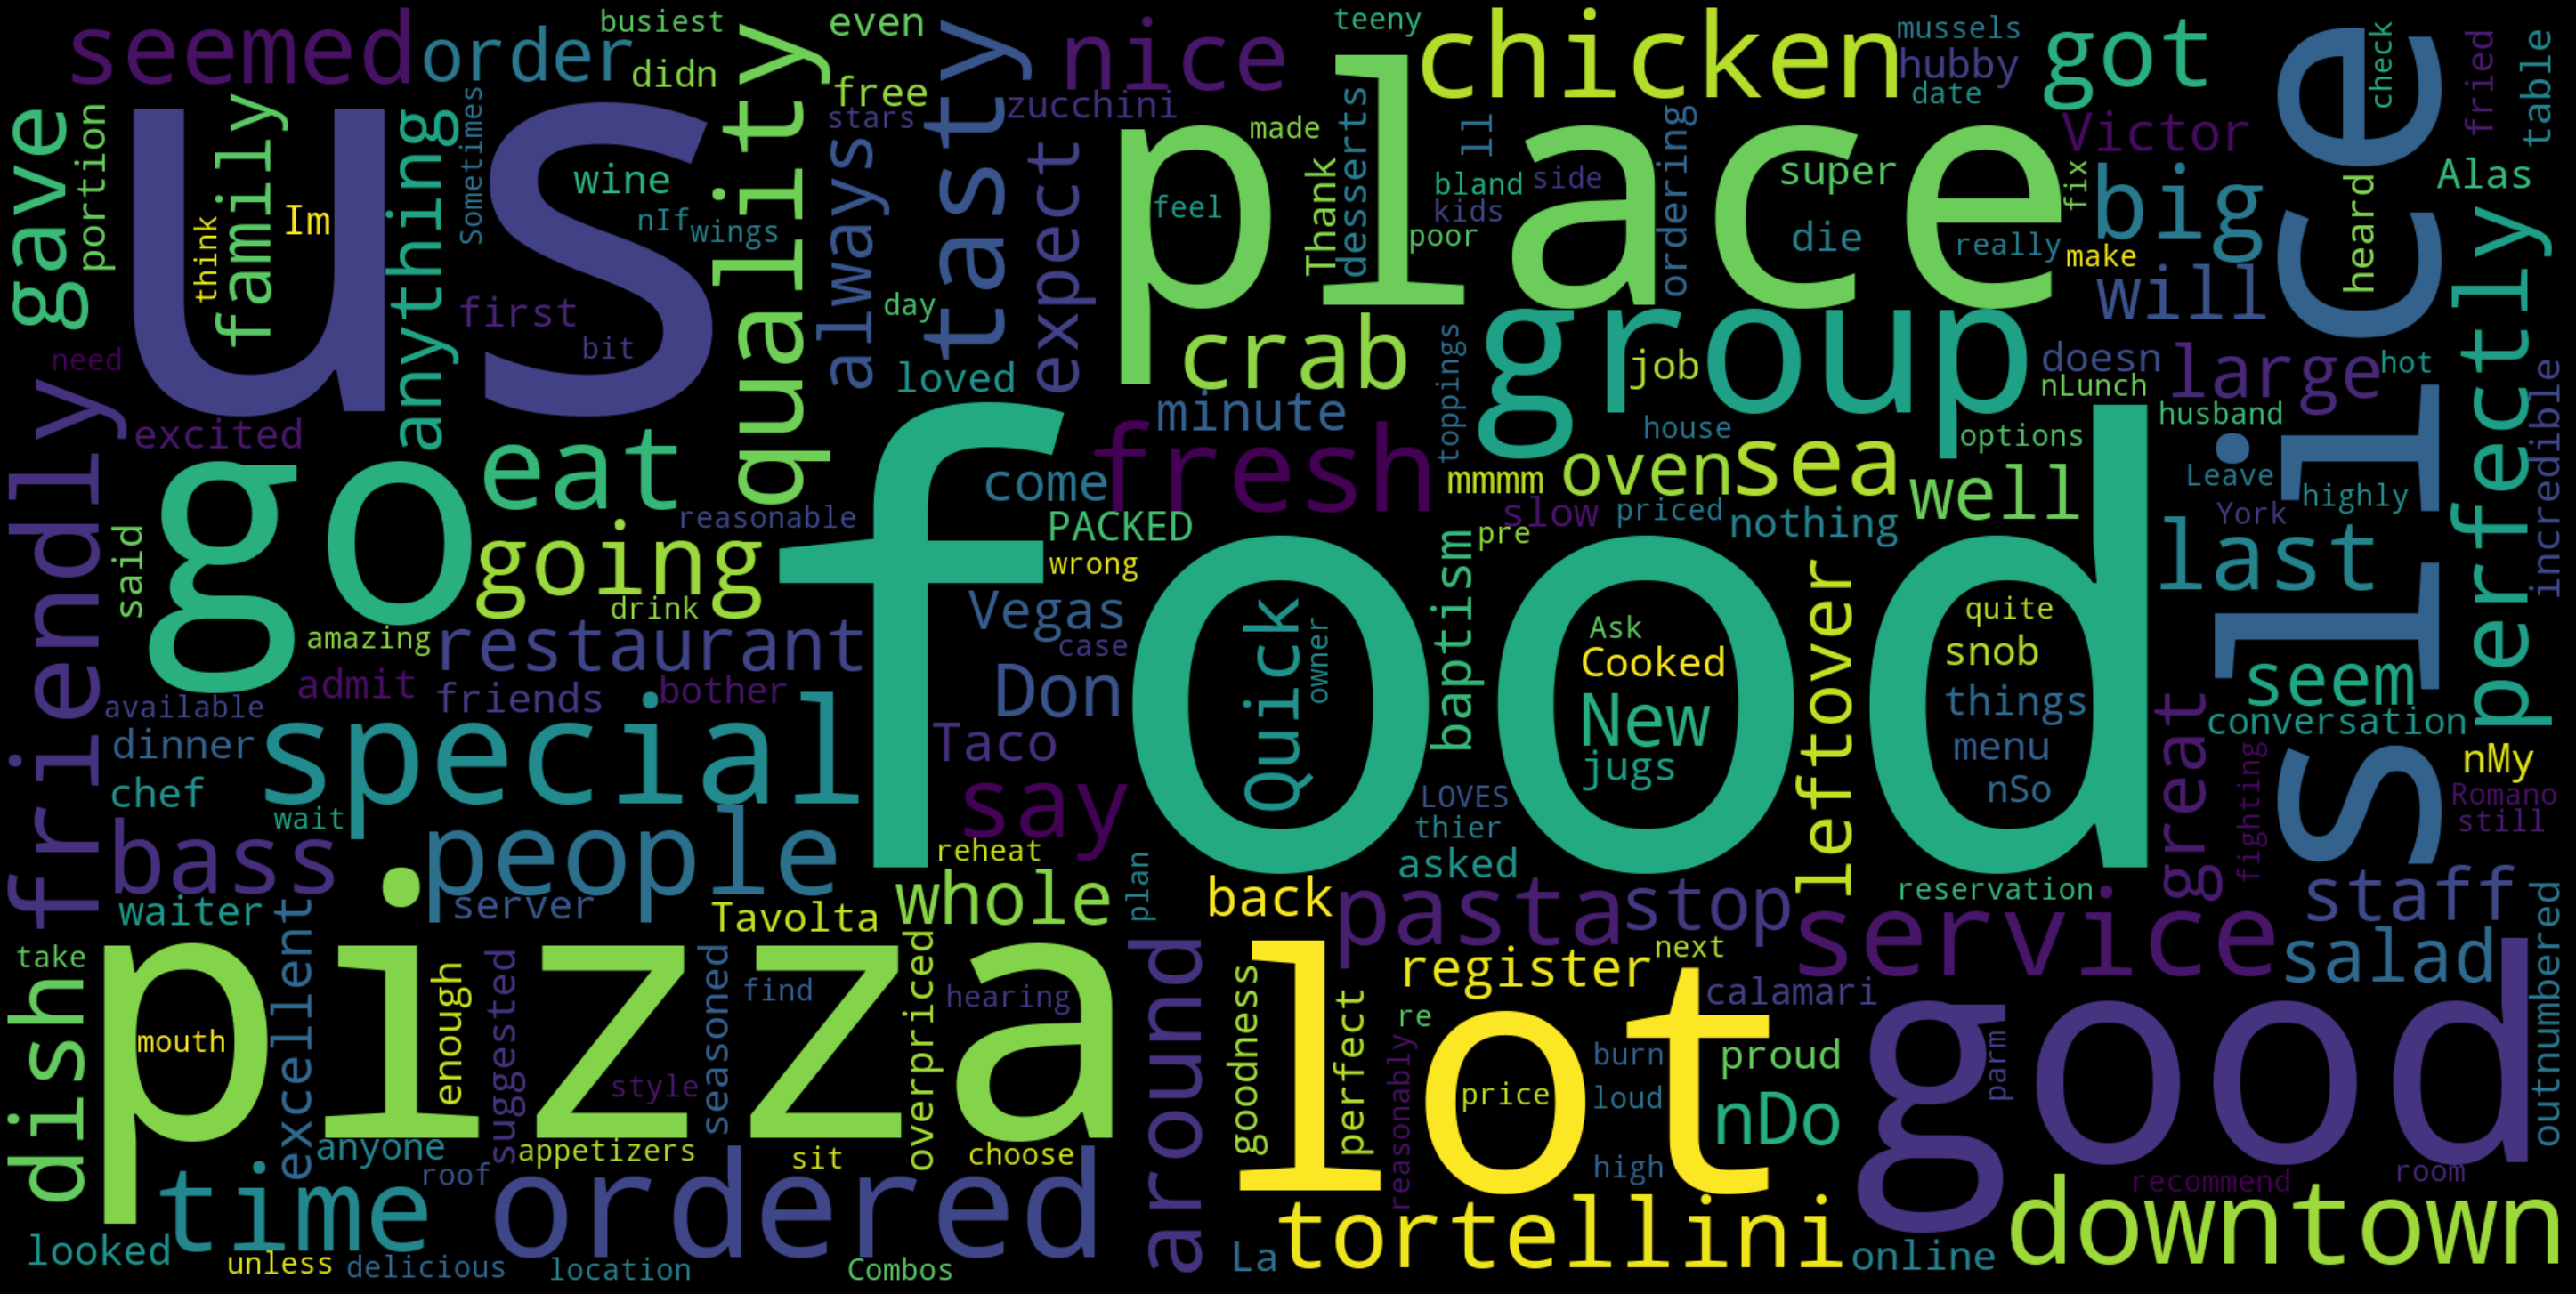

In [243]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = positive_reviews.text.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Negative Reviews by Star Rating

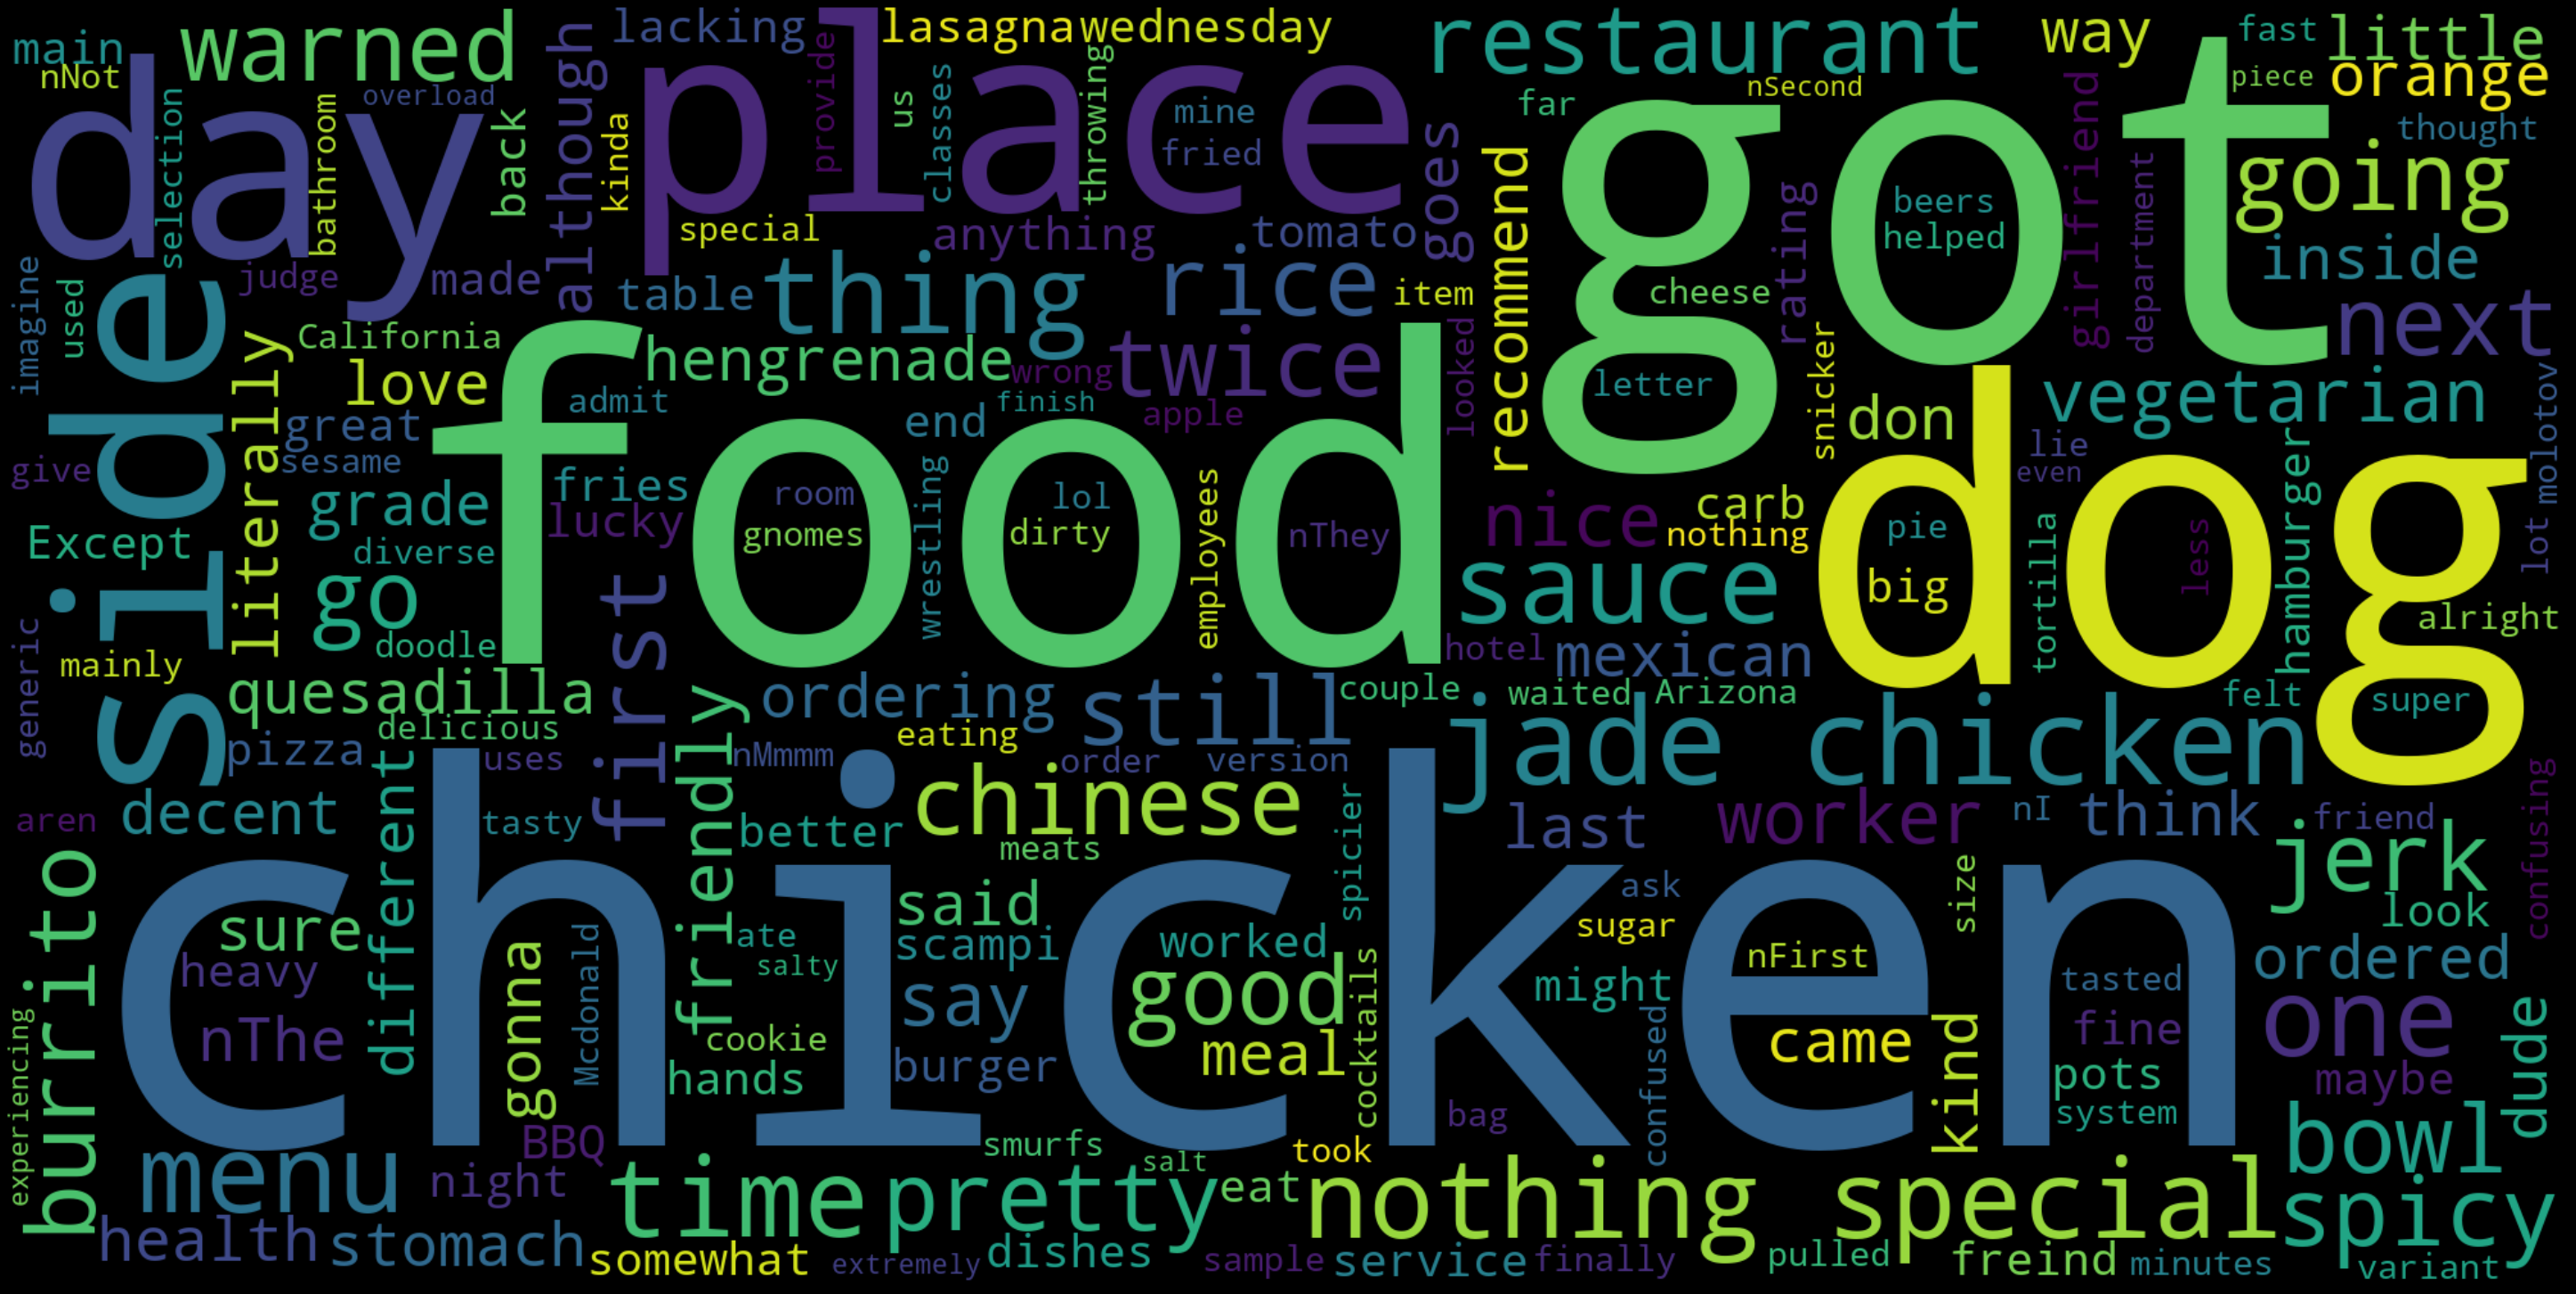

In [244]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = negative_reviews.text.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()